In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import PIL
import math, operator   

In [2]:
img = cv2.imread('./images/img1.jpg',0)

In [3]:
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_img = clahe.apply(img)

In [5]:
cv2.imshow('img',eq_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def adaphisteq(img, tilesize):
    img = img.astype(np.float32)
    x, y = img.shape
    img_eq = np.zeros_like(img)
    for i in range(0, x, tilesize):
        for j in range(0, y, tilesize):
            tile = img[i:i+tilesize, j:j+tilesize]
            hist, bins = np.histogram(tile, 256, [0, 256])
            cdf = hist.cumsum()
            cdf = 255 * cdf / cdf[-1]
            img_eq[i:i+tilesize, j:j+tilesize] = np.interp(img[i:i+tilesize, j:j+tilesize], bins[:-1], cdf)
    return img_eq

In [7]:
user_hist_img = adaphisteq(img, tilesize=64)

In [8]:
# Typecasting to int
user_hist_img = [[round(i) for i in k] for k in user_hist_img]

In [9]:
user_hist_img = np.clip(user_hist_img, 0, 255)
user_hist_img = np.array(user_hist_img, dtype=np.uint8)

In [10]:
cv2.imshow('img',user_hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [12]:
rmse(eq_img,user_hist_img)

10.2276471652558

Text(0.5, 1.0, 'Adaptive Hist Eq (part b)')

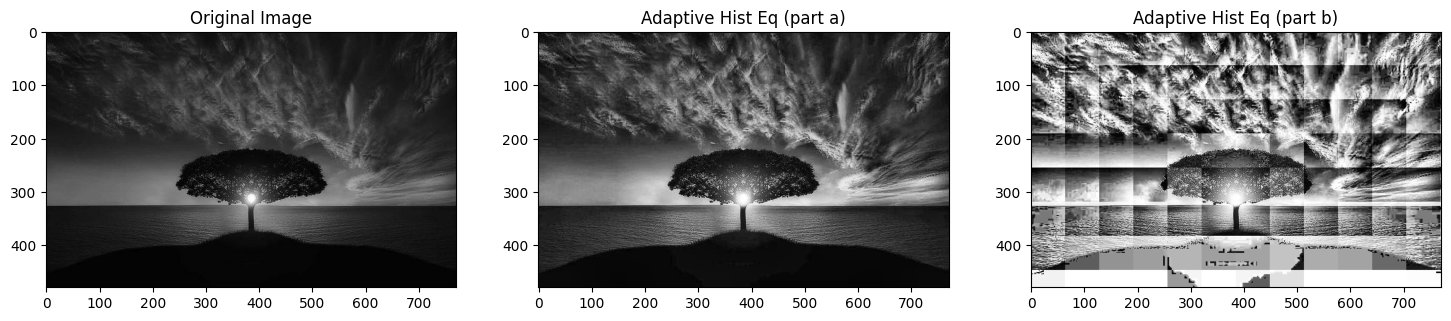

In [13]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img,cmap='gray'); plt.title('Original Image')
plt.subplot(132); plt.imshow(eq_img,cmap='gray'); plt.title('Adaptive Hist Eq (part a)')
plt.subplot(133); plt.imshow(user_hist_img,cmap='gray'); plt.title('Adaptive Hist Eq (part b)')